# 沪深20指数预测
本案例数据集来自广西人工智能大赛第五赛区，在此采用ModelArts平台进行复现，本案例仅做简单的交流与分享

## 进入ModelArts

点击如下链接：https://www.huaweicloud.com/product/modelarts.html ， 进入ModelArts主页。点击“立即使用”按钮，输入用户名和密码登录，进入ModelArts使用页面。


第一步：在ModelArts服务主界面依次点击“开发环境”、“创建”

create_nb_create_button

第二步：填写notebook所需的参数：

jupyter

第三步：配置好notebook参数后，点击下一步，进入notebook信息预览。确认无误后，点击“立即创建”
jupyter

第四步：创建完成后，返回开发环境主界面，等待Notebook创建完毕后，打开Notebook，进行下一步操作。
modelarts_notebook_index

## 在ModelArts中创建开发环境

接下来，我们创建一个实际的开发环境，用于后续的实验步骤。

第一步：点击下图所示的“启动”按钮，加载后“打开”按钮变从灰色变为蓝色后点击“打开”进入刚刚创建的Notebook

第二步：创建一个Python3环境的的Notebook。点击右上角的"New"，然后选择xgboost-sklearn开发环境。

第三步：点击左上方的文件名"Untitled"，并输入一个与本实验相关的名称，如"index_predict"


## 在Notebook中编写并执行代码

在Notebook中，我们输入一个简单的打印语句，然后点击上方的运行按钮或者按shitf+enter，可以查看语句执行的结果：

In [1]:
print("Hello")

Hello


## 首先在obs桶中下载数据


In [ ]:
import moxing
moxing.file.copy_parallel('obs://gxu-finance-bucket/dataset-20','./')

## 导入打开文件和画图的包

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
computer_index = [555,
948,
2131,
2063,
2322,
600728,
2232,
4,
600602,
2253,
2230,
682,
600588,
600633,
2153,
997,
600406,
600845,
2315,
600570
]
medical_index = [2262,2287,600195,739,600085,600161,600216,600276,600521,756,2001,2252,2022,2030,600867,513,2007,
                  600196,600436,661
]

In [4]:
price_data = pd.read_csv("个股价格.csv")
price_data = price_data[9204:]#开始位置
price_data

,交易日期,股票代码,日开盘价,日最高价,日最低价,日收盘价,日个股交易股数,日个股交易金额,日个股流通市值,日个股总市值,日个股回报率
9204,2010-03-31,158,10.60,10.88,10.43,10.75,20684322,2.209011e+08,7727755.75,7727755.75,0.023810
9205,2010-03-31,423,27.89,28.25,27.51,28.20,3395774,9.476798e+07,15021852.05,18443407.34,0.011478
9206,2010-03-31,503,10.98,11.25,10.91,11.20,19165731,2.132221e+08,6372991.32,8389007.24,0.019108
9207,2010-03-31,513,39.86,39.86,39.08,39.20,488663,1.924154e+07,6964627.54,7202157.12,-0.009351
9208,2010-03-31,518,4.23,4.23,4.16,4.17,12179783,5.096515e+07,3758223.52,4293249.45,-0.014184
...,...,...,...,...,...,...,...,...,...,...,...
375558,2019-12-31,600850,25.10,25.40,24.95,25.36,2954932,7.468407e+07,10815521.24,10815521.24,0.015212
375559,2019-12-31,600851,7.74,8.12,7.66,8.04,5200550,4.148253e+07,5935177.12,5935177.12,0.038760
375560,2019-12-31,600867,12.35,12.68,12.24,12.65,59174751,7.428334e+08,25729954.74,25729954.74,0.025953
375561,2019-12-31,600892,5.83,5.83,5.68,5.71,13351316,7.648708e+07,3085452.95,3194540.51,-0.030560


In [5]:
X_2019 = pd.read_csv("个股价格.csv")[335390:]

In [6]:
X_2019

,交易日期,股票代码,日开盘价,日最高价,日最低价,日收盘价,日个股交易股数,日个股交易金额,日个股流通市值,日个股总市值,日个股回报率
335390,2019-01-02,4,16.05,16.24,16.01,16.06,142400,2.290041e+06,1333191.74,1348665.55,0.001871
335391,2019-01-02,153,5.17,5.24,5.11,5.22,1150953,5.980666e+06,1628521.14,1655145.23,0.013592
335392,2019-01-02,158,5.27,5.31,5.09,5.18,7970603,4.118816e+07,8413287.87,8561892.30,-0.007663
335393,2019-01-02,403,25.18,25.90,24.31,24.40,354535,8.772184e+06,6473043.65,6650893.42,-0.030977
335394,2019-01-02,423,39.57,40.09,38.90,39.55,2734061,1.076080e+08,25860452.23,25866551.79,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
375558,2019-12-31,600850,25.10,25.40,24.95,25.36,2954932,7.468407e+07,10815521.24,10815521.24,0.015212
375559,2019-12-31,600851,7.74,8.12,7.66,8.04,5200550,4.148253e+07,5935177.12,5935177.12,0.038760
375560,2019-12-31,600867,12.35,12.68,12.24,12.65,59174751,7.428334e+08,25729954.74,25729954.74,0.025953
375561,2019-12-31,600892,5.83,5.83,5.68,5.71,13351316,7.648708e+07,3085452.95,3194540.51,-0.030560


In [7]:
labels = price_data["交易日期"].unique().tolist()
price_data["交易日期"] = price_data["交易日期"].apply(lambda x: labels.index(x))
#把日期设成0，1，2...

## 对总市值求平均值

In [8]:

total = []
for date in range(0,2130+244):
    medical_sum = 0.0
    computer_sum = 0.0
    cnt1 = 0
    cnt2 = 0
    every_day = price_data[(price_data["交易日期"] == date)]
    for index,row in every_day.iterrows():
        if row["股票代码"] in medical_index:
            cnt1 +=1
            medical_sum += row["日个股总市值"]
        elif row["股票代码"] in computer_index:
            cnt2+=1
            computer_sum += row["日个股总市值"]
    computer_sum = 0 if cnt2==0 else computer_sum/cnt2
    medical_sum = 0 if cnt1==0 else medical_sum/cnt1
    total.append(medical_sum + computer_sum)

In [9]:
total = np.array(total)
total#2010年到2019年的市值平均值

array([17763316.38377778, 17180791.22736842, 18109785.17      , ...,
       71124143.70400001, 71491272.63999999, 72618581.7485    ])

## 对数据进行去重

In [10]:
train_data = pd.read_csv("train.csv")
uni = train_data["交易日期"].unique().tolist()
train_data["交易日期"] = train_data["交易日期"].apply(lambda x: uni.index(x))
train_data

,交易日期,沪深20指数
0,0,100.000000
1,1,102.148049
2,2,101.963745
3,3,101.721455
4,4,103.222463
...,...,...
2369,2369,NaN
2370,2370,NaN
2371,2371,NaN
2372,2372,NaN


## 将求得总市值合并进一个表

In [11]:
train_data = pd.concat([pd.DataFrame(train_data),pd.DataFrame(total)],axis=1)
train_data[2100:]
train_data.columns = ["交易日期","沪深20指数","当日优质股平均总市值"]

In [12]:
train_data

,交易日期,沪深20指数,当日优质股平均总市值
0,0,100.000000,1.776332e+07
1,1,102.148049,1.718079e+07
2,2,101.963745,1.810979e+07
3,3,101.721455,1.835877e+07
4,4,103.222463,1.809835e+07
...,...,...,...
2369,2369,NaN,7.080610e+07
2370,2370,NaN,7.172846e+07
2371,2371,NaN,7.112414e+07
2372,2372,NaN,7.149127e+07


## 用Sklearn自带的MinMaxScaler函数做归一化

In [27]:
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler = scaler.fit(train_data.iloc[:,train_data.columns!="沪深20指数"])
result = pd.DataFrame(scaler.transform(train_data.iloc[:,train_data.columns!="沪深20指数"]))

In [29]:
result
result.columns = ["交易日期","当日优质股平均总市值"]

## 划分数据集

In [30]:
X = result
y = train_data["沪深20指数"].dropna()
Xtrain = X[:1900]
Ytrain = y[:1900]
Xtest = X[1900:2130]
Ytest =y[1900:2130]


## 调用接口进行建模

In [31]:
reg = LinearRegression().fit(Xtrain,Ytrain)

In [32]:
y_pre = reg.predict(Xtest)
y_pre

array([484.75039587, 494.05732567, 493.7212912 , 498.98610314,
       512.14582501, 512.58987247, 499.03784356, 501.45345869,
       494.427598  , 481.79163209, 479.8796992 , 473.8748249 ,
       452.66298436, 451.69593648, 460.18313828, 445.75368759,
       462.68102691, 466.3997711 , 454.22248878, 465.02506716,
       447.46097572, 454.59429357, 452.22942695, 452.05097629,
       464.3026058 , 461.18622306, 468.16869797, 478.1283705 ,
       474.3968498 , 488.54357585, 486.99558824, 492.9231604 ,
       485.05292735, 480.9620846 , 479.86009408, 477.33724754,
       489.01112369, 496.89205355, 489.53326969, 485.92761089,
       469.9935514 , 484.39250529, 491.7710611 , 483.03117675,
       480.93834792, 497.57087059, 495.37993266, 493.23750849,
       487.7607246 , 486.65354091, 491.89945022, 492.40082475,
       497.97973027, 488.04683777, 495.68493584, 479.62792513,
       485.07933426, 486.18640455, 479.54531882, 478.83123731,
       486.84202051, 495.53567516, 484.66837348, 488.17

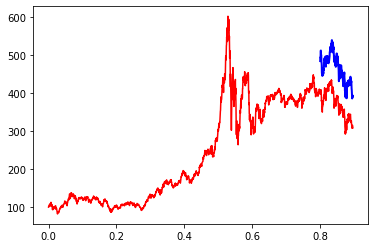

In [33]:
plt.figure()
x = np.arange(0,1)
plt.plot(X["交易日期"][:2130], y,color="red", label="data")
plt.plot(np.array(Xtest["交易日期"]), y_pre, color="blue",label="predict", linewidth=2)